In [1]:
import warnings; warnings.simplefilter('ignore')

# Conceptual exercises

## Non-linear separation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# generate non-linear separated data
np.random.seed(30100)
x1 = np.random.randn(100)
x2 = 4*x1**2 + np.random.randn(100)
label = np.random.choice(2, size=100)
x2[label==1] = x2[label==1]+5

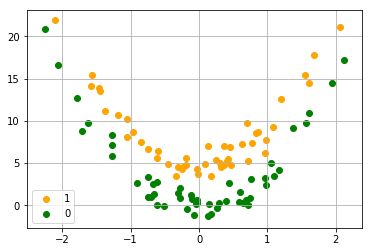

In [3]:
plt.scatter(x1[label==1], x2[label==1], c='orange', label="1")
plt.scatter(x1[label==0], x2[label==0], c='green', label="0")
plt.legend()
plt.grid()
plt.show()

In [4]:
# Experiment with polynomial kernel and radial kernel
x = np.vstack((x1, x2)).T
y = label

x_train = x[:80]; y_train = y[:80]
x_test = x[80:]; y_test = y[80:]

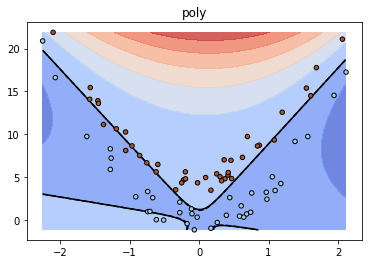

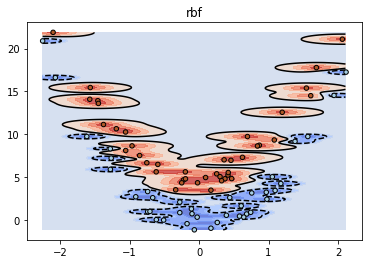

In [5]:
# fit the model
from sklearn import svm

for idx, kernel in enumerate(('poly', 'rbf')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(x_train, y_train)

    plt.figure(idx)
    plt.clf()
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10,
                cmap=plt.cm.Paired, edgecolor='k', s=20)
    plt.axis('tight')
    x_min = x_train[:, 0].min()
    x_max = x_train[:, 0].max()
    y_min = x_train[:, 1].min()
    y_max = x_train[:, 1].max()

    xx, yy = np.mgrid[x_min:x_max:0.01, y_min:y_max:0.01]
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.contour(xx, yy, Z, colors=['k', 'k'],
                linestyles=['--', '-'], levels=[-.5, 0])
    plt.title(kernel)
plt.show()

In [6]:
# error on the training data
model_lst = (svm.SVC(kernel='poly'), svm.SVC(kernel='rbf'))
model_lst = [clf.fit(x_train, y_train) for clf in model_lst]
print('The training error rate of SVC with polynomial is {:.2%}'.format(1- model_lst[0].score(x_train, y_train)))
print('The training error rate of SVC with radial is {:.2%}'.format(1- model_lst[1].score(x_train, y_train)))

The training error rate of SVC with polynomial is 12.50%
The training error rate of SVC with radial is 12.50%


In [7]:
# error on the testing data
from sklearn.metrics import accuracy_score

predict = [clf.predict(x_test) for clf in model_lst]
print('The training error rate of SVC with polynomial is {:.2%}'.format(1-accuracy_score(y_test, predict[0])))
print('The training error rate of SVC with radial is {:.2%}'.format(1-accuracy_score(y_test, predict[1])))

The training error rate of SVC with polynomial is 15.00%
The training error rate of SVC with radial is 15.00%


As we can see, the SVM classifier with polynomial kernel performs slightly worse when fitting on the training set, but they performed equally (not so well) on the test set.

## SVM vs. logistic regression

### Generate a data set with n=500 and p=2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [8]:
np.random.seed(123)
x1 = np.random.randn(500)
x2 = np.random.randn(500)
label = 1*((x1**2 - x2**2) + np.random.randn(500) < 0) #quadratic boundary

### Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis and X2 on the y-axis.

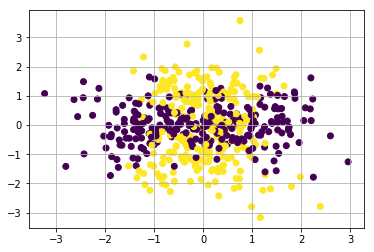

In [9]:
plt.scatter(x1, x2, c=label)
plt.grid()
plt.show()

### Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [10]:
from sklearn.linear_model import LogisticRegression

x = np.vstack((x1, x2)).T
y = label
logit = LogisticRegression().fit(x, y)

### Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

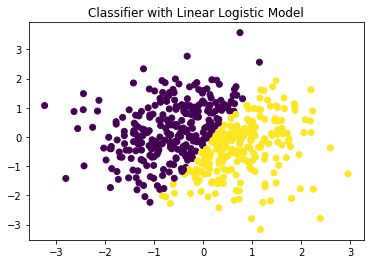

In [11]:
plt.scatter(x[:,0], x[:,1], c = logit.predict(x))
plt.title("Classifier with Linear Logistic Model")
plt.show()

Clearly the decision boundary is linear.

### Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. $X_{1}^{2}$, $X_{1} \times X_{2}$, $log(X2)$, and so forth).

In [12]:
x1_sq = np.square(x1)
x2_sq = np.square(x2)
x1_x2 = x1*x2

x_order2 = np.array((x1, x2, x1_sq, x2_sq, x1_x2)).T

In [13]:
logit_poly = LogisticRegression().fit(x_order2, y)

### Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat steps 1-5 until you come up with an example in which the predicted class labels are obviously non-linear.

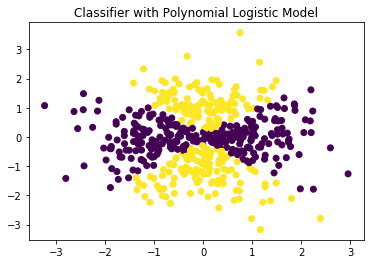

In [14]:
plt.scatter(x_order2[:,0], x_order2[:,1], c = logit_poly.predict(x_order2))
plt.title("Classifier with Polynomial Logistic Model")
plt.show()

Clearly the decision boundary is nonlinear, and the classifier is already doing pretty well on the task.

### Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

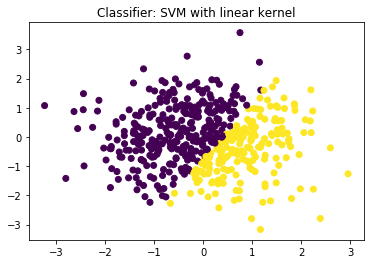

In [15]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x, y)

plt.scatter(x[:,0], x[:,1], c = svm_linear.predict(x))
plt.title("Classifier: SVM with linear kernel")
plt.show()

### Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

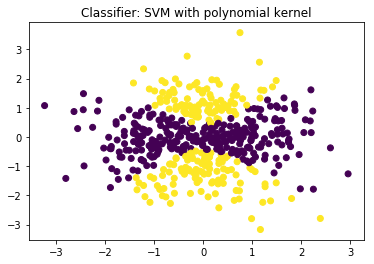

In [16]:
svm_poly = svm.SVC(kernel='poly', degree = 2)
svm_poly.fit(x, y)

plt.scatter(x[:,0], x[:,1], c = svm_poly.predict(x))
plt.title("Classifier: SVM with polynomial kernel")
plt.show()

### Comment on your results.

With the real decision boundary as quadratic, both the logistic model and SVM model with linear settings clearly failed to detect the boundary. But when we allow nonlinear terms into the logistic parameter settings, or change the SVM kernel to non-linear ones, the classifier performed cool. However, adding extra features to the logistic regression manually can be prohibitive when the feature space is very high-dimensional. Therefore, we should still go for the SVM model, where there are only very few parameters to tune up.

## Tuning the cost parameter

### Generate two-class data with p=2 in such a way that the classes are just barely linearly separable.

In [17]:
np.random.seed(1234)
x1 = np.random.uniform(high=1, low=-1, size=1000)
x2 = np.random.uniform(high=1, low=-1, size=1000)
label = 1*((x1+x2) + 0.01*np.random.rand(1000)> 0)

x = np.vstack((x1, x2)).T
y = label

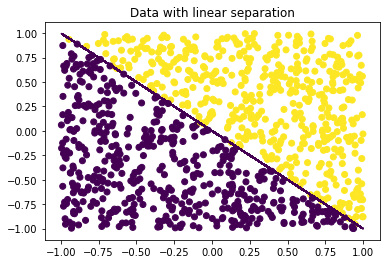

In [18]:
plt.scatter(x[:,0], x[:,1], c = y)
X, Y =np.meshgrid(x1, x2)
plt.contour(X, Y, X+Y, [0])
plt.title("Data with linear separation")
plt.show()

Clearly we can see that the classes are linearly separable.

### Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are made for each value of cost considered, and how does this relate to the cross-validation errors obtained?

In [19]:
from sklearn.model_selection import cross_val_score, KFold

c_lst = np.logspace(-1, 5, 10)
cv_error = [1-np.mean(cross_val_score(svm.SVC(kernel='linear', C=c), x, y, cv=KFold(5), scoring='accuracy')) for c in c_lst]

In [20]:
train_error = [1-svm.SVC(kernel='linear', C=c).fit(x,y).score(x,y) for c in c_lst]

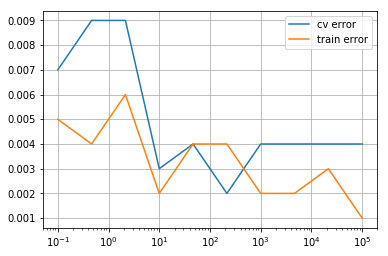

In [21]:
plt.plot(c_lst, cv_error, label='cv error')
plt.plot(c_lst, train_error, label='train error')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

We can see that the training error is plummeting drastically as we increase the cost on the errors, and that can reach zero errors pretty quickly. The cross validation error also decreases fast at fisrt, but then bump up agian with larger cost values, which indicate we might be overfittting on the training set.

### Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

In [22]:
np.random.seed(7007)
x_test = np.random.uniform(1, -1, size=(400, 2))
label_test = 1*(x_test.mean(axis=1)> 0)

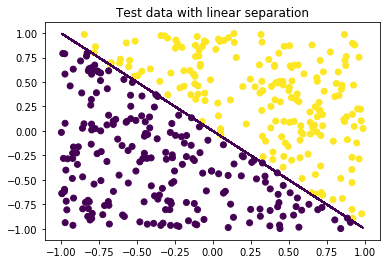

In [23]:
# plot on the test data
plt.scatter(x_test[:,0], x_test[:,1], c = label_test)
X, Y =np.meshgrid(x_test[:,0], x_test[:,1])
plt.contour(X, Y, X+Y, [0])
plt.title("Test data with linear separation")
plt.show()

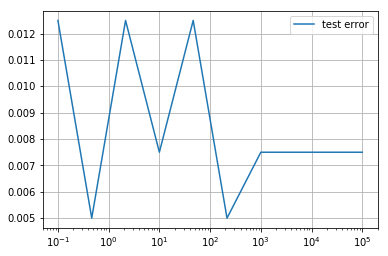

In [24]:
test_error = [1-svm.SVC(kernel='linear', C=c).fit(x,y).score(x_test,label_test) for c in c_lst]

plt.plot(c_lst, test_error, label='test error')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [25]:
print("The training error reaches the minimum of {} when the cost value is {}"
      .format(min(train_error), c_lst[np.argmin(train_error)]))
print("The cv error reaches the minimum of {} when the cost value is {}"
      .format(min(cv_error), c_lst[np.argmin(cv_error)]))
print("The testing error reaches the minimum of {} when the cost value is {}"
      .format(min(test_error), c_lst[np.argmin(test_error)]))

The training error reaches the minimum of 0.0010000000000000009 when the cost value is 100000.0
The cv error reaches the minimum of 0.0020000000000000018 when the cost value is 215.44346900318823
The testing error reaches the minimum of 0.0050000000000000044 when the cost value is 0.46415888336127786


### Discuss your results.

The test errors plot kind of shares the pattern with cv errors. The error rate reaches its minimum pretty quickly, but starts to pick up later when the cost value becomes large. The training error can decrease quickly and stably stay at the lowest level, but it will be overfitting when the cost value on fitting errors are large, which leads to lame performance on the test set.

# Predicting attitudes towards racist college professors

## Fit a support vector classifier to colrac using all available predictors, using 10-fold cross-validation to select an optimal value for cost. Report the CV errors associated with different values of parameters, and comment on your results.

In [26]:
import pandas as pd

gss_train = pd.read_csv("data/gss_train.csv")

In [27]:
x_train = gss_train.drop(['colrac'], axis=1).values
y_train = gss_train['colrac'].values

In [28]:
c_lst = np.logspace(-2, 2, 5)
svm_lst = [svm.SVC(kernel='linear', C=c) for c in c_lst]
cv_error = [1-np.mean(cross_val_score(svm, x_train, y_train, cv=KFold(10), scoring='accuracy')) for svm in svm_lst]

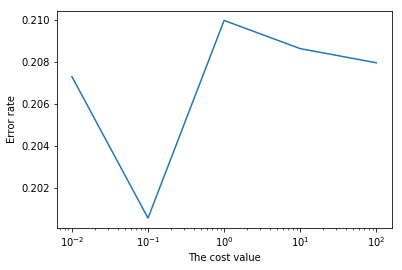

In [29]:
plt.plot(c_lst, cv_error)
plt.xscale('log')
plt.xlabel("The cost value")
plt.ylabel("Error rate")
plt.show()

Using the linear kernel, we can see that the cv error reached the minimum when c=0.1, and then increased as the cost value gets larger.

## Repeat (1) using SVMs with radial and polynomial basis kernels, with different values for `gamma` and `degree` and `cost`. Comment on your results.

In [30]:
# With polynomial kernel
c_lst = np.logspace(-2, 2, 5)
gamma_lst = np.logspace(-5, 0, 5)
cv_error = []; opt_gamma = []
for degree in [2,3,4]:
    for c in c_lst:
        svm_lst = [svm.SVC(kernel='poly', C=c, degree = degree, gamma = gamma) for gamma in gamma_lst]
        errors = [1-np.mean(cross_val_score(svm, x_train, y_train, cv=KFold(10), scoring='accuracy')) for svm in svm_lst]
        idx = np.argmin(errors)
        cv_error.append(errors[idx])
        opt_gamma.append(gamma_lst[idx])

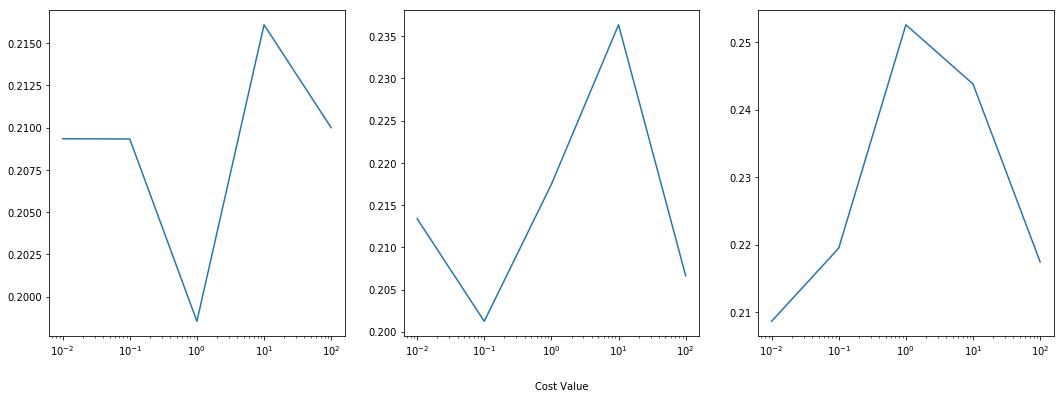

In [31]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches((18, 6))
for i in range(3):
    x_ax = c_lst; y_ax = cv_error[i*5:i*5+5]
    ax = axes[i]
    ax.plot(x_ax, y_ax)
    ax.set_xscale('log')
fig.text(0.5, 0.01, 'Cost Value', va='center')
plt.show()

In [32]:
opt_idx = np.argmin(cv_error)
print("The minimal error rate is reached the minimum of {}, when gamma={}, degree={} and cost={}"
      .format(cv_error[opt_idx], opt_gamma[opt_idx], [2,3,4][opt_idx//5], c_lst[opt_idx%5]))

The minimal error rate is reached the minimum of 0.19853528024668976, when gamma=0.0031622776601683794, degree=2 and cost=1.0


In [33]:
# With radial kernel
c_lst = np.logspace(-2, 3, 5)
gamma_lst = np.logspace(-5, 0, 5)
cv_error = []; opt_gamma = []
for c in c_lst:
    svm_lst = [svm.SVC(kernel='rbf', C=c, gamma = gamma) for gamma in gamma_lst]
    errors = [1-np.mean(cross_val_score(svm, x_train, y_train, cv=KFold(10), scoring='accuracy')) for svm in svm_lst]
    idx = np.argmin(errors)
    cv_error.append(errors[idx])
    opt_gamma.append(gamma_lst[idx])

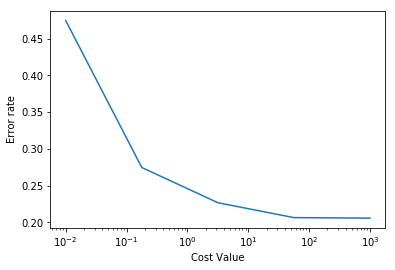

In [34]:
plt.plot(c_lst, cv_error)
plt.xscale('log')
plt.xlabel("Cost Value")
plt.ylabel("Error rate")
plt.show()

In [35]:
opt_idx = np.argmin(cv_error)
print("The minimal error rate is reached the minimum of {} when gamma={} and cost={}"
      .format(cv_error[opt_idx], opt_gamma[opt_idx], c_lst[opt_idx]))

The minimal error rate is reached the minimum of 0.2059541084708869 when gamma=1e-05 and cost=1000.0


For the polynomial kernel, I experimented with different polynomila degrees, and the training cv error all seem to decrease first and then pick up again when the cost value gets too large. For the radial kernel, the training cv error decreases slowly against the increase in cost value. The best performed model, within my attempted parameter settings, is the polynomial kernel SVC where c=1.0, degree=2, and gamma=0.03. I will continue with this model to evaluate the model features.

### Provide a substantive interpretation of the best model, using feature importance and PDPs/ICE. This should include (at minimum) 3-5 graphs, plus written analysis.

In [36]:
svc = svm.SVC(kernel='poly', C = 1.0, degree=2, gamma=0.03, probability=True)
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.03, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

model = InMemoryModel(svc.predict_proba, examples = x_train)
interpreter = Interpretation(x_train)
importance = interpreter.feature_importance.feature_importance(model)

2019-03-10 03:56:14,961 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[55/55] features ████████████████████ Time elapsed: 4 seconds

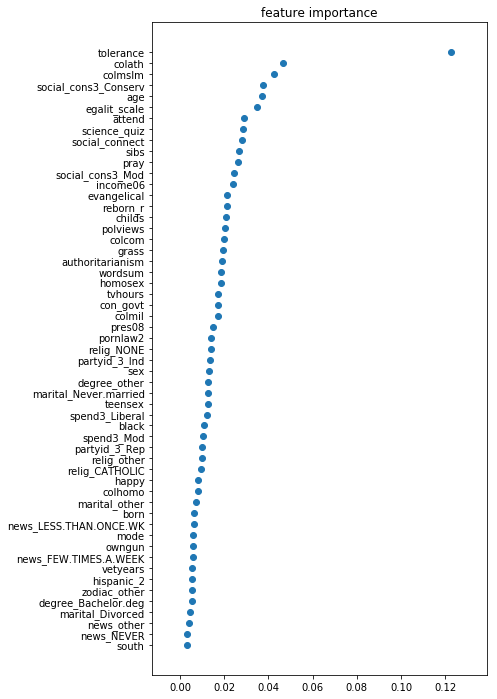

In [38]:
features = np.array(gss_train.drop(['colrac'], axis=1).columns)
plt.figure(figsize=(6,12))
plt.scatter(importance, np.arange(0,len(features)))
_ = plt.yticks(np.arange(0,len(features)), features[list(importance.index)])
_ = plt.title('feature importance')

As we can see from this SVM model with polynomial kernel, the 5 most influential features that are predictive of whether one is racist are: tolerance, colath, colmslm, social_cons3_Conserv, egalit_scale. And I would love to plot the PDP/ICE for each of these variables.

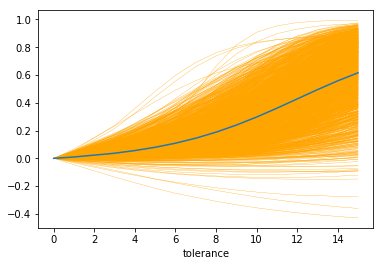

In [39]:
from pycebox.ice import ice, ice_plot

ice_df = ice(gss_train.drop(['colrac'], axis=1), 'tolerance', lambda x:svc.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='orange', linewidth=0.3, plot_pdp=True, centered=True)
plt.xlabel('tolerance')
plt.show()

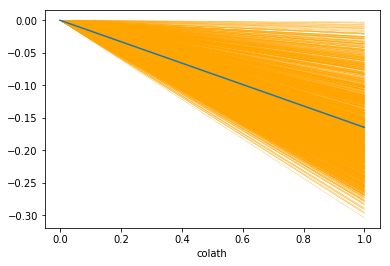

In [40]:
ice_df = ice(gss_train.drop(['colrac'], axis=1), 'colath', lambda x:svc.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='orange', linewidth=0.3, plot_pdp=True, centered=True)
plt.xlabel('colath')
plt.show()

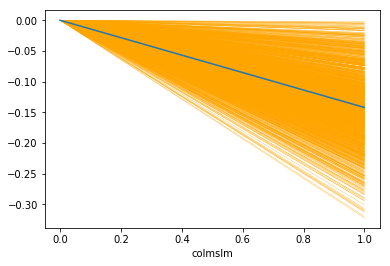

In [41]:
ice_df = ice(gss_train.drop(['colrac'], axis=1), 'colmslm', lambda x:svc.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='orange', linewidth=0.3, plot_pdp=True, centered=True)
plt.xlabel('colmslm')
plt.show()

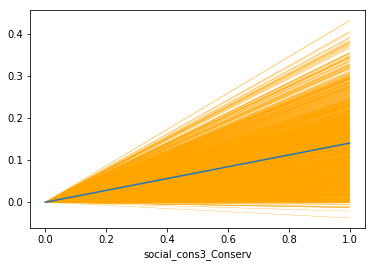

In [42]:
ice_df = ice(gss_train.drop(['colrac'], axis=1), 'social_cons3_Conserv', lambda x:svc.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='orange', linewidth=0.3, plot_pdp=True, centered=True)
plt.xlabel('social_cons3_Conserv')
plt.show()

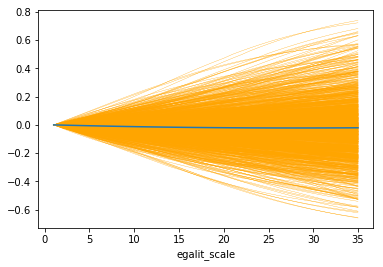

In [43]:
ice_df = ice(gss_train.drop(['colrac'], axis=1), 'egalit_scale', lambda x:svc.predict_proba(x)[:,0], num_grid_points=100)
ice_plot(ice_df, c='orange', linewidth=0.3, plot_pdp=True, centered=True)
plt.xlabel('egalit_scale')
plt.show()

From these Independent Conditional Expectation plots, we can find that the tolerance and social_cons3_Conserv are positively associated with the likelihood of allowing the racist professor to teach. In contrast, colath and colmslm can affect the probability negatively, and the egalit_scale variable seems to have a slightly negative effect.

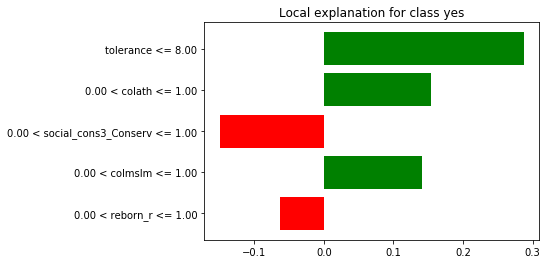

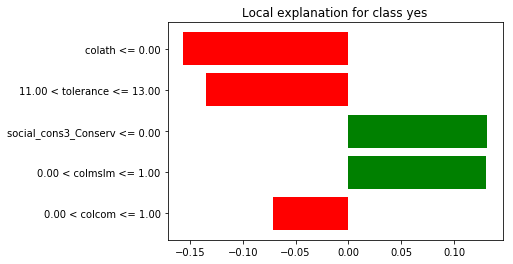

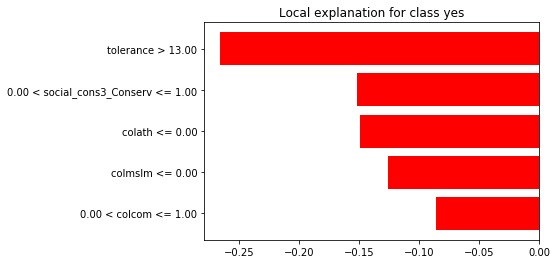

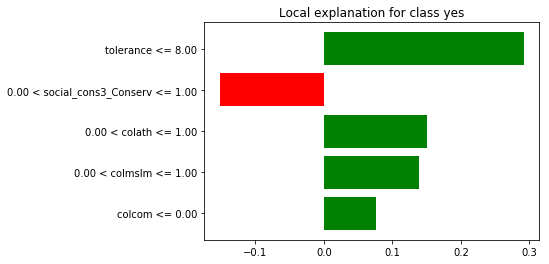

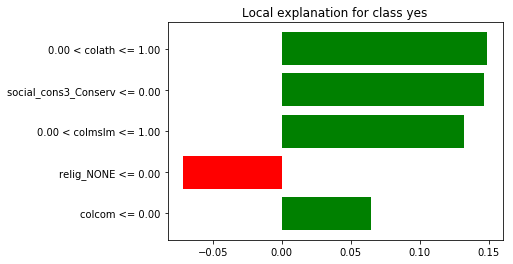

In [44]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=np.array(gss_train.drop(['colrac'], axis=1).columns),
                                                   class_names=['colrac:no', 'yes'],  feature_selection='auto')
predict_fn = lambda x:svc.predict_proba(x)
np.random.seed(1234)
for i in np.random.choice(x_train.shape[0], size=5):
    exp = explainer.explain_instance(x_train[i,:], predict_fn, num_features=5)
    exp.as_pyplot_figure()

For these five randomly selected sample, the five globally most important features also help to predict the local outcomes. But it seems that the direction of these variable effects and the ranking is not so cosistent among one another.